<a href="https://colab.research.google.com/github/Catherine-Nguyen88/project_chd/blob/main/chd_Isabella's_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Isabella's part

In [1]:
! git clone https://github.com/Catherine-Nguyen88/project_chd

Cloning into 'project_chd'...
remote: Enumerating objects: 174, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 174 (delta 87), reused 69 (delta 62), pack-reused 74
Receiving objects: 100% (174/174), 6.77 MiB | 9.90 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

## 1. Clean data

In [3]:
train_data = pd.read_csv('./project_chd/fhs_train.csv')
test_data = pd.read_csv('./project_chd/fhs_test.csv')

# clean training data
train_data1 = train_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

train_final = train_data1
#train_final = train_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
#                          'diabetes', 'totChol', 'sysBP',
#                          'diaBP', 'BMI', 'TenYearCHD']]
train_final1 = train_final.dropna()

# clean testing data
test_data1 = test_data.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
# test_final = test_data1.loc[:,['sex', 'currentSmoker', 'cigsPerDay',
#                                  'diabetes', 'totChol', 'sysBP',
#                                  'diaBP', 'BMI', 'TenYearCHD']]
test_final = test_data1
test_final1 = test_final.dropna()

## 2. EDA

#### Explore relationships between variables

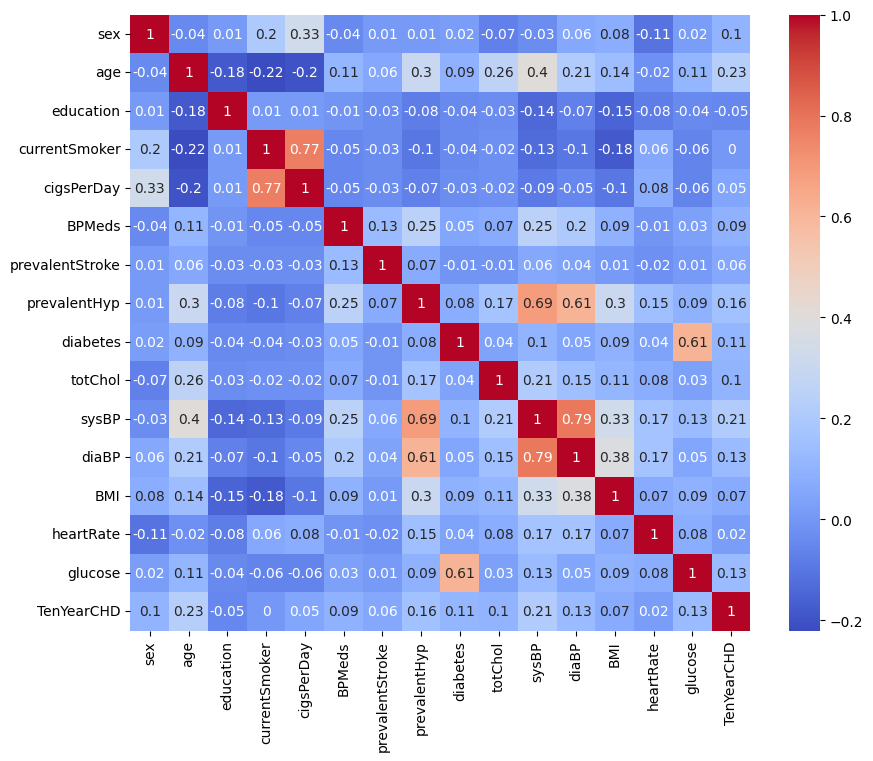

In [ ]:
corr_matrix = train_final.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

Variables are weakly correlated with TenYearCHD, at best. The variables with the strongest correlations to TenYearCHD are age (0.23), sysBP (0.21), prevalentHyp (0.16), diaBP (0.13). glucose (0.13), diabetes (0.11), and sex (0.1).

sysBP and diaBP are highly correlated (0.79). cigsPerDay and currentSmoker are also highly correlated (0.77).

#### Check for outliers in the data

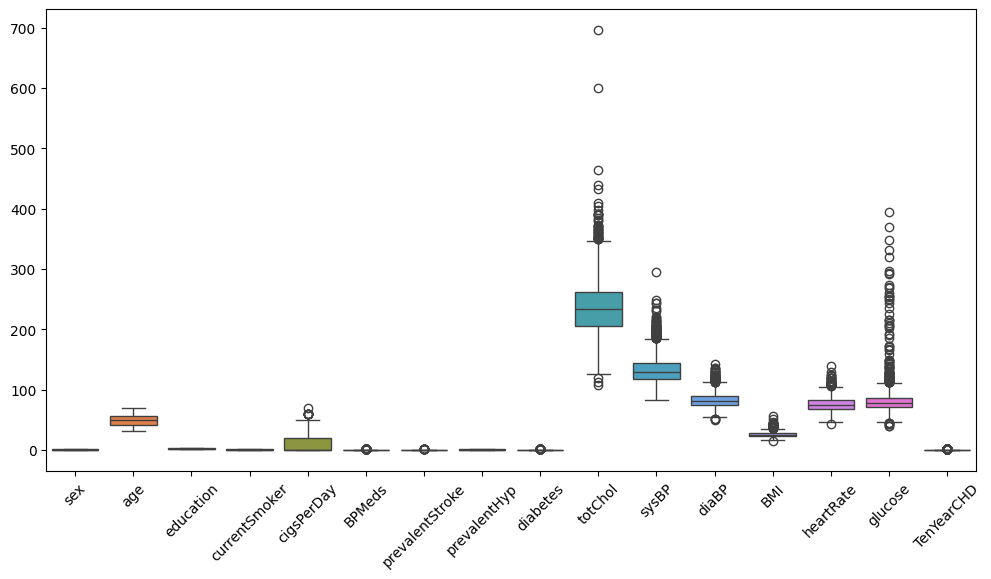

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_final)
plt.xticks(rotation=45)
plt.show()

outliers are present for totChol, sysBP, diaBP, BMI, heartRate, glucose.

In [4]:
# remove outliers before proceeding
print('train_data with outliers')
print(train_final1.shape)
train_final2 = train_final1.loc[train_final1['sysBP']<215,:]
train_final2 = train_final2.loc[train_final2['diaBP']<150,:]
train_final2 = train_final2.loc[train_final2['glucose']<200,:]
train_final2 = train_final2.loc[train_final2['totChol']<400,:]
train_final2 = train_final2.loc[train_final2['heartRate']<120,:]
print(train_final2.shape)

train_data with outliers
(2744, 16)
(2691, 16)


In [5]:
2691/2744 # keep 98%

0.9806851311953353

## 3. Trees

use tree to predict TenYearCHD

## Test decision tree with max depth of 5

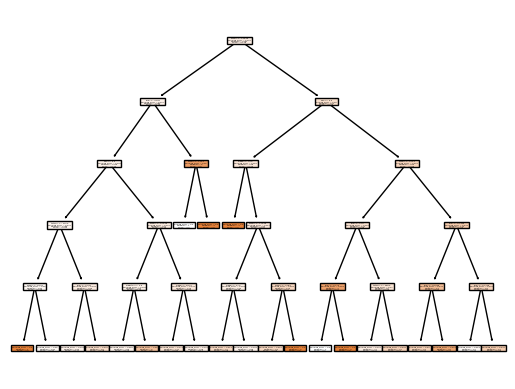

In [ ]:
# process data
y = train_final2['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI']
X = train_final2.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

# fit decision tree
cart = DecisionTreeRegressor(max_depth = 5) # create a regression object
cart = cart.fit(X,y) # fit the regression
var_names = cart.feature_names_in_

# visualize results
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()

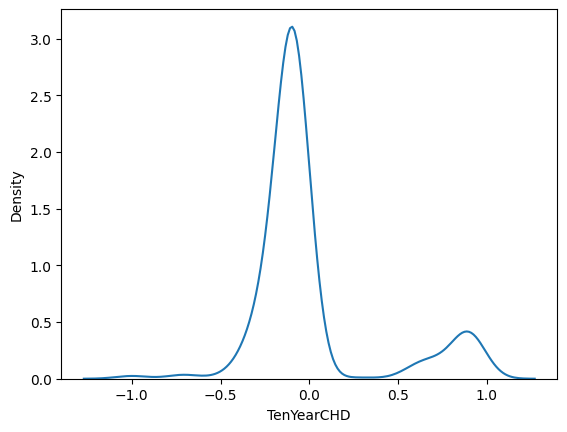

Rsq:  0.0032062228904674583 

RMSE:  0.35205854389101815 



In [ ]:
# make predictions on the test set
y_hat = cart.predict(X_test)

# residuals, rsq, rmse
e = y_test - y_hat
sns.kdeplot(e)
plt.show()
rsq = 1-np.sum(e**2)/np.sum((y_test - np.mean(y))**2)
RMSE = np.sqrt(np.mean(e**2))

print('Rsq: ', rsq, '\n')
print('RMSE: ', RMSE, '\n')

### Test decision tree fit for depth of 1 to 20
- save Rsq and rmse and plot



In [ ]:
# process data
y = train_final1['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI',
        'age','prevalentStroke','prevalentHyp','heartRate','glucose']
X = train_final1.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

depths = np.arange(1,20,1)
rsq_results = {}
RMSE_results = {}

criterions = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
for crit in criterions:
  rsq = []
  RMSE = []
  for dep in depths:
    # fit decision tree with given depth
    cart = DecisionTreeRegressor(max_depth=dep,criterion=crit,min_samples_split=20)
    cart = cart.fit(X,y) # fit the regression
    var_names = cart.feature_names_in_

    # make predictions on the test set
    y_hat = cart.predict(X_test)

    # residuals, rsq, rmse
    e = y_test - y_hat
    rsq_val = 1-np.sum(e**2)/np.sum((y_test - np.mean(y))**2)
    rsq.append(rsq_val)
    rmse_val = np.sqrt(np.mean(e**2))
    RMSE.append(rmse_val)

  rsq_results[crit] = rsq
  RMSE_results[crit] = RMSE

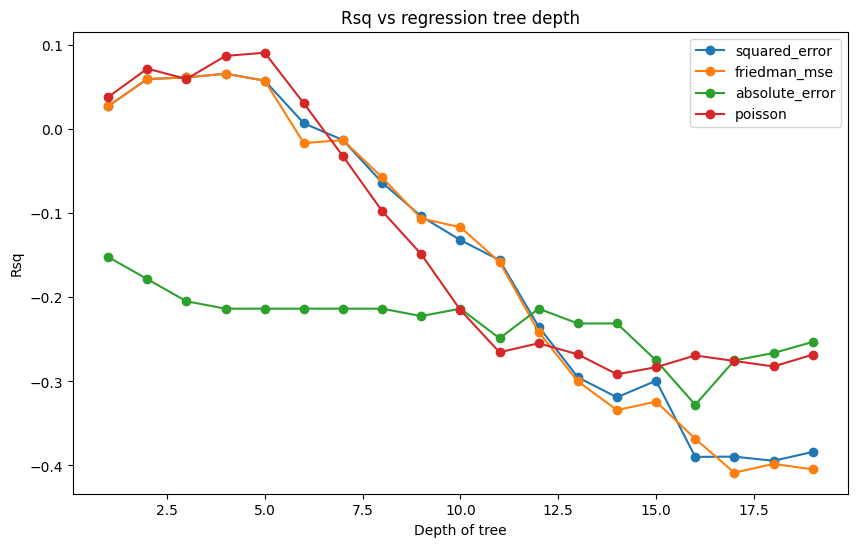

In [ ]:
plt.figure(figsize=(10,6))
for crit in criterions:
  plt.plot(depths,rsq_results[crit],marker='o',label=crit)
plt.title("Rsq vs regression tree depth")
plt.legend()
plt.xlabel("Depth of tree")
plt.ylabel("Rsq")
plt.show()

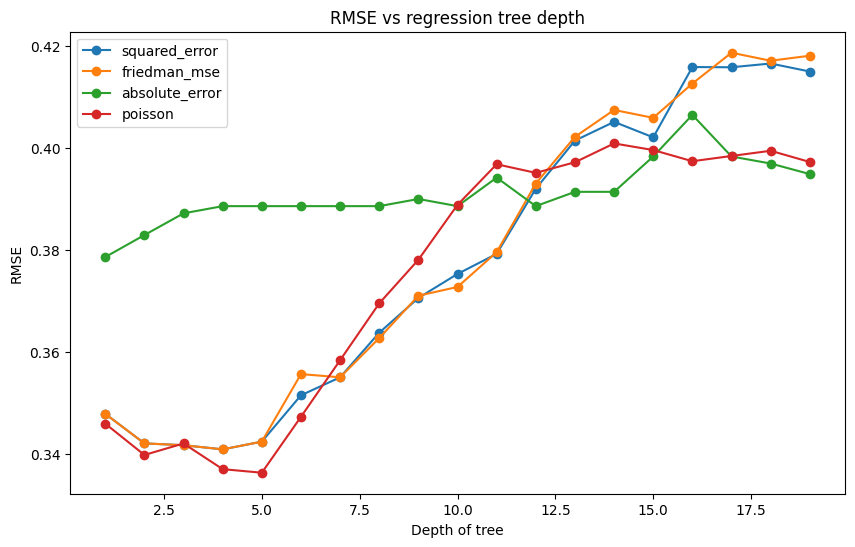

In [ ]:
plt.figure(figsize=(10,6))
for crit in criterions:
  plt.plot(depths,RMSE_results[crit],marker='o',label=crit)
# plt.plot(depths,RMSE,marker='o',color='palevioletred')
plt.title("RMSE vs regression tree depth")
plt.legend()
plt.xlabel("Depth of tree")
plt.ylabel("RMSE")
plt.show()

A tree depth of 5 with the poisson criterion gives the lowest RMSE and highest Rsq

### test for depth of 5

In [ ]:
cart = DecisionTreeRegressor(max_depth=5,criterion='poisson',min_samples_split=20,random_state=1)
cart = cart.fit(X,y) # fit the regression
var_names = cart.feature_names_in_

# make predictions on the test set
y_hat = cart.predict(X_test)

# residuals, rsq, rmse
e = y_test - y_hat
rsq = 1-np.sum(e**2)/np.sum((y_test - np.mean(y))**2)
RMSE = np.sqrt(np.mean(e**2))

print(rsq)
print(RMSE)

0.08222140031461145
0.3379213768823969


**Confusion matrix**

In [ ]:
y_hat[y_hat < 0.5] = 0
y_hat[y_hat >= 0.5] = 1
## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
#acc = np.trace(tab)/np.sum(np.sum(tab,axis=0)) # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.8610503282275711 



col_0,0.0,1.0
TenYearCHD,,
0,767,14
1,113,20


Regardless of the depth of the tree, the Rsq value is very low and the RMSE is high, suggesting that this method is not effective for predicting TenYearCHD, at least based on the variables chosen.

# Test decision tree using fewer variables

In [ ]:
# process data
y = train_final1['TenYearCHD']
vars = ['age','sysBP','diaBP','BMI','glucose','totChol','heartRate']
X = train_final1.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

depths = np.arange(1,50,5)
rsq = np.zeros(len(depths))
RMSE = np.zeros(len(depths))

for i in range(0,len(depths)):
  # fit decision tree with given depth
  cart = DecisionTreeRegressor(max_depth=depths[i],criterion='poisson',min_samples_split=20)
  cart = cart.fit(X,y) # fit the regression
  var_names = cart.feature_names_in_

  # make predictions on the test set
  y_hat = cart.predict(X_test)
  # y_hat[y_hat < 0.5] = 0
  # y_hat[y_hat >= 0.5] = 1

  # residuals, rsq, rmse
  e = y_test - y_hat
  rsq[i] = 1-np.sum(e**2)/np.sum((y_test - np.mean(y))**2)
  RMSE[i] = np.sqrt(np.mean(e**2))

In [ ]:
rsq

array([ 0.03823592, -0.06386884, -0.23940055, -0.34979149, -0.35189388,
       -0.34811288, -0.34778553, -0.35061113, -0.34371524, -0.32520373])

# Combine trees and linear regression

In [23]:
y = train_final2['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI',
        'age','prevalentStroke','prevalentHyp','heartRate','glucose']
X = train_final2.loc[:,vars]

# log transform some variables in X
X['totChol'] = np.log(X['totChol'])
X['glucose'] = np.log(X['glucose'])
X['heartRate'] = np.log(X['heartRate'])
X['BMI'] = np.log(X['BMI'])
X['diaBP'] = np.log(X['diaBP'])
X['sysBP'] = np.log(X['sysBP'])

X_test = test_final1.loc[:,vars]
X_test['totChol'] = np.log(X_test['totChol'])
X_test['glucose'] = np.log(X_test['glucose'])
X_test['heartRate'] = np.log(X_test['heartRate'])
X_test['BMI'] = np.log(X_test['BMI'])
X_test['diaBP'] = np.log(X_test['diaBP'])
X_test['sysBP'] = np.log(X_test['sysBP'])
y_test = test_final1['TenYearCHD']

# linear regression
linear_reg = LinearRegression()
linear_reg.fit(X, y) # fit linear regression using the predicted classes

# predict test data
y_hat = linear_reg.predict(X_test)

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ')
print(rmse)

print('R squared: ')
print(linear_reg.score(X_test, y_test))

RMSE: 
0.33589124938267095
R squared: 
0.09262440085743895


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

y = train_final2['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI',
        'age','prevalentStroke','prevalentHyp','heartRate','glucose']
X = train_final2.loc[:,vars]

# log transform some variables in X
# X['totChol'] = np.log(X['totChol'])
# X['glucose'] = np.log(X['glucose'])
# X['heartRate'] = np.log(X['heartRate'])
# X['BMI'] = np.log(X['BMI'])
# X['diaBP'] = np.log(X['diaBP'])
# X['sysBP'] = np.log(X['sysBP'])

X_test = test_final1.loc[:,vars]
# X_test['totChol'] = np.log(X_test['totChol'])
# X_test['glucose'] = np.log(X_test['glucose'])
# X_test['heartRate'] = np.log(X_test['heartRate'])
# X_test['BMI'] = np.log(X_test['BMI'])
# X_test['diaBP'] = np.log(X_test['diaBP'])
# X_test['sysBP'] = np.log(X_test['sysBP'])
y_test = test_final1['TenYearCHD']

# fit the decision tree classifier to hte data
cart = DecisionTreeClassifier()
cart.fit(X, y)
cart = cart.predict(X) # predictions for the training data

# linear regression
linear_reg = LinearRegression()
linear_reg.fit(X, cart) # fit linear regression using the predicted classes

# predict test data
lin_pred = linear_reg.predict(X_test)

rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ')
print(rmse)

print('R squared: ')
print(linear_reg.score(X_test, y_test))

RMSE: 
0.33589124938267095
R squared: 
0.0963544563205071


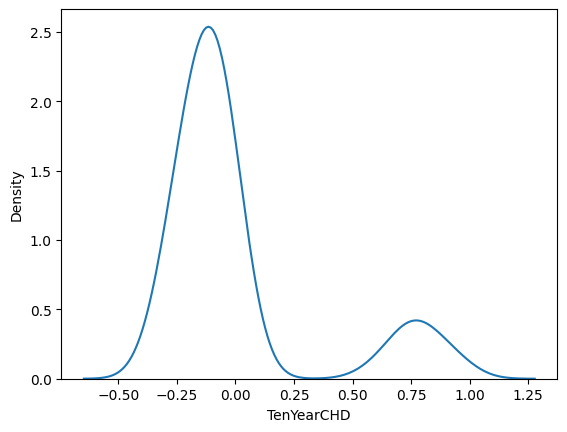

In [19]:
sns.kdeplot(y_test - y_hat ) # Residual plot
plt.show()
# the resituals have a bimodal distirbution and aren't centered around zero

Report accuracy using confusion matrix

In [25]:
# y_hat[y_hat < 0.5] = 0
# y_hat[y_hat >= 0.5] = 1
# ## Confusion Matrix
# tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
# acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
# #acc = np.trace(tab)/np.sum(np.sum(tab,axis=0)) # Faster way to compute accuracy
# print('Accuracy: ', acc, '\n')
# pd.crosstab(y_test,y_hat)


IndexError: index 1 is out of bounds for axis 0 with size 1

Winsorize X!

In [ ]:
def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

In [ ]:
from sklearn.linear_model import LinearRegression

y = train_final1['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI',
        'age','prevalentStroke','prevalentHyp','heartRate','glucose']
X = train_final1.loc[:,vars]

# winsorize!
for var in vars:
    X[var] = winsorize(X[var])

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

# fit the decision tree classifier to hte data
cart = tree.DecisionTreeClassifier()
cart.fit(X, y)
plot_tree(cart,filled=True,feature_names=tree.feature_names_in_ )
plt.show()
cart = cart.predict(X) # predictions for the training data

# linear regression
linear_reg = LinearRegression()
linear_reg.fit(X, cart) # fit linear regression using the predicted classes

# predict test data
lin_pred = linear_reg.predict(X_test)

rmse = np.sqrt( np.mean( (y_test - lin_pred)**2 ))
print('RMSE: ')
print(rmse)

print('R squared: ')
print(linear_reg.score(X_test, y_test))

RMSE: 
0.33560805028536117
R squared: 
0.09415382219673973


Winsorizing did not help

In [ ]:
y_hat[y_hat < 0.5] = 0
y_hat[y_hat >= 0.5] = 1
## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
#acc = np.trace(tab)/np.sum(np.sum(tab,axis=0)) # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.8610503282275711 



col_0,0.0,1.0
TenYearCHD,,
0,767,14
1,113,20


# Combine regression and KMC

In [ ]:
from sklearn.cluster import KMeans

y = train_final1['TenYearCHD']
vars = ['sex','currentSmoker','cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI',
        'age','prevalentStroke','prevalentHyp','heartRate','glucose']
X = train_final1.loc[:,vars]

X_test = test_final1.loc[:,vars]
y_test = test_final1['TenYearCHD']

cluster = KMeans(n_clusters=4, max_iter=300, n_init=10, random_state=0)
cluster = cluster.fit(X)
cluster_predict = cluster.predict(X) # predictions for the training data

# linear regression
linear_reg = LinearRegression()
linear_reg.fit(X, cluster_predict) # fit linear regression using the predicted classes

# predict test data
lin_pred = linear_reg.predict(X_test)

rmse = np.sqrt( np.mean( (y_test - lin_pred)**2 ))
print('RMSE: ')
print(rmse)

print('R squared: ')
print(linear_reg.score(X_test, y_test))

RMSE: 
1.1109786697071296
R squared: 
-8.926614540273468


# Summary of results:

I used a regression tree to predict TenYearCHD. I determined the optimal tree depth and criterion to measure the quality of a split. Finally, I used a classification tree to classify inputs to a linear regression model. I evaluated my results using R-squared, RMSE, and the accuracy.

I tested including all variables in the model ('sex','currentSmoker' 'cigsPerDay','diabetes','totChol','sysBP','diaBP','BMI','age','prevalentStroke','prevalentHyp','heartRate','glucose') and only the variables that had the strongest correlations with TenYearCHD. The model with all variables performed better. I also tried removing outliers to improve the regression tree model.

**Conclusions**
*  EDA: Variables are weakly correlated with TenYearCHD, at best. The variables with the strongest correlations to TenYearCHD are age (0.23), sysBP (0.21), prevalentHyp (0.16), diaBP (0.13). glucose (0.13), diabetes (0.11), and sex (0.1). Outliers are present in the data and may be impacting the model
*   I tested regression tree depth from 1 to 20 and a split criterion of squared error, friedman mse, absolute error, and poisson. The best tree used a depth of 5 and poisson as the criterion based on the rsq and rmse. After a depth of 5, the rsq decrased and the rmse increased. The model performs poorly for all depths using rmse and rsq as measures of performance.
*   For a tree depth of 5 and poisson split criterion, the rsq is 0.04 and the rmse is 0.35. The accuracy is 85% if we assume that predicted values of TenYearCHD below 0.5 are 0 and above 0.5 are 1.
*   When we combine decision trees with regression, we get a better Rsq of 0.096 and an rmse of 0.3435. The residuals have a bimodal distribution that is not centered around zero. Based on the confusion matrix, the accuracy is 85%. The results do not improve much if we winsorize the data beforehand.
*   It seems like rsq may not be the best measure of model performance in the case of a binary response variable.










